<a href="https://colab.research.google.com/github/aabhashree-github/python-visualization/blob/main/(GitHub)_CMPS_335_Project_1_lamichhanea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project One

This assignment uses a famous dataset called the Pima Indians Diabetes dataset. The Pima people are Native Americans in the Southwest. Researchers gathered this dataset while trying to understand the incidence of diabetes amongst women in the group. 

The dataset has medical measurements of individuals and an outcome, 0 or 1, indicating whether that individual tested postive for diabetes. The dataset is used to test  classification algorithms ability to predict diabetes given the medical measurements.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # used to make training & test sets
from sklearn.preprocessing import StandardScaler # used to scale data to zero mean/unit variance
from sklearn.naive_bayes import GaussianNB # The naive bayes algorithm
from sklearn.neighbors import KNeighborsClassifier # The k-nearest-neighbors algorithm
from sklearn.metrics import plot_confusion_matrix # Generate a confusion matrix
from sklearn import tree # Import the decision tree namespace

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pima = pd.read_csv('/content/drive/My Drive/Hollins Data Science/Datasets/pima_indians_diabetes.csv')
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
pima.shape

(768, 9)

# Part One

The goal of this part is to compare three different types of models trained on the Pima dataset.

1) Generate training and test data from the Pima dataset.

2) Create a Guassian Naive Bayes model using the default parameters and fit it to the training data. Then plot the resulting confusion matrix using the testing data.

3) Create a K Nearest Neigbors model using the default parameters and fit it to the training data. Then plot the resulting confusion matrix using the testing data.

4) Create a Decision Tree model using entropy for attribute selection and a depth limit of 3. Then plot the resulting confusion matrix using the testing data. As an example here is the code for this:

```
# Create and fit the model using entropy separation and a maximum depth
dt_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt_model.fit(training_features, training_targets)

# Plot the confusion matrix
plot_confusion_matrix(dt_model, testing_features, testing_targets, labels=[1,0])
```
5) Plot the resulting tree using the code below:
```
# Let's check out the tree
plt.figure(figsize=(20,12))
tree.plot_tree(dt_model)
plt.show()
```


In [ ]:
#1.
# Generating training and test data for the Pima dataset
training_set, test_set = train_test_split(pima, test_size = 0.20)

#Use the first two features for training
#Using only two features means we can plot the training points
training_features = training_set.iloc[:,:-1]
#Targets are at the end
training_targets = training_set.iloc[:,-1]

#Pull out the same features and targets from test set
testing_features = test_set.iloc[:,:-1]
testing_targets = test_set.iloc[:,-1]


In [ ]:
#2.
#Creating a Guassian Naive Bayes Model using the default parameters and fitting it to the training data
gnb_model = GaussianNB()
gnb_model.fit(training_features, training_targets)

GaussianNB(priors=None, var_smoothing=1e-09)

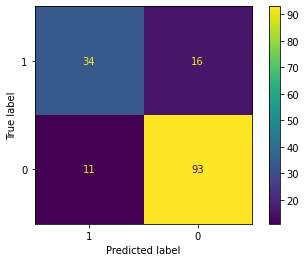

In [ ]:
#Plotting the resulting confusion matrix using the testing data
plot_confusion_matrix(gnb_model, testing_features, testing_targets, labels=[1, 0])

In [ ]:
#3.
#Creating a K-nearest neighbors model using the default parameters and fitting it to the training data
knn1_model = KNeighborsClassifier(metric='euclidean', n_neighbors=5)
knn1_model.fit(training_features, training_targets)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

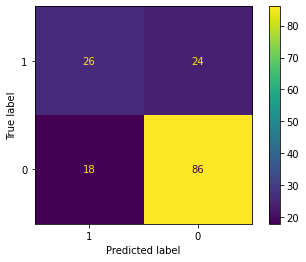

In [ ]:
#Plotting the resulting confusion matrix using the testing data
plot_confusion_matrix(knn1_model, testing_features, testing_targets, labels=[1, 0])

In [ ]:
#4.
#Creating a Decision Tree model using entropy for attribute selection and a depth limit of 3
dtpima_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtpima_model.fit(training_features, training_targets)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

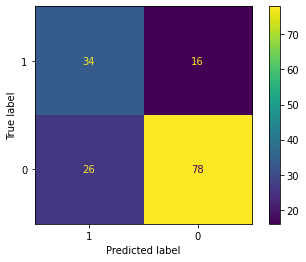

In [ ]:
#Plotting the resulting confusion matrix using the testing data
plot_confusion_matrix(dtpima_model, testing_features, testing_targets, labels=[1,0])

## Short Answer One

Run your above code twice. Why do the results of the models change? What is happening?

Now evaluate each model by looking at the confusion matrices. For this binary classification task the confusion matrices have the form:

```
True Positive | False Negative
------------------------------
False Postive | True Negative
```
Accuracy is (TP + TN)/(TP + FN + FP + TN). Run all of the above code three times (including the separation of training and testing sets) and calculate the accuracy for each model for each run. What were their average accuracies? Which model had the highest average? Which was lowest? Is there much difference between the models' performance?

Look at the decision tree, what are the features that the decision tree is looking at to make its decisions? Why did the decision tree choose to look at those features? (answered below the decision tree)

Create text cells below and answer these questions.

*Answers:*

The results of the models change because the training set and test set are splitted at random every time we run the code.

***

**Round 1 Accuracies:**

Guassian Model = 0.81818
***
K-Nearest Neighbors Model = 0.72078
***
Decision Tree Model = 0.77273
***
**Round 2 Accuracies:**

Guassian Model = 0.70130
***
K-Nearest Neighbors Model = 0.71429
***
Decision Tree Model = 0.77922
***
**Round 3 Accuracies:**

Guassian Model = 0.72078
***
K-Nearest Neighbors Model = 0.66883
***
Decision Tree Model = 0.74675
***




**Average Accuracies**

Guassian Model = 0.74675
***
K-Nearest Neighbors = 0.70130
***
Decision Tree Model = 0.76623
***


The Decision Tree Model has the highest average whereas the K-Nearest Neightbors Model has the lowest average. 

The Guassian Model has a high accuracy in the first round but the Decision Tree model stands with more accuracy in the other two rounds. However, this is calculated from randomly generated data, so it can fluctutate. The K-nearest neighbor is usually the one with lower accuracy than the other two and its average is also the lowest. Overall the performance of all three models is quite close to each other in some rounds whereas in some rounds there is a vast difference, for eg. in round 2 where the accuracy of the Decision Tree model was greater by 7 points than the lowest one.  

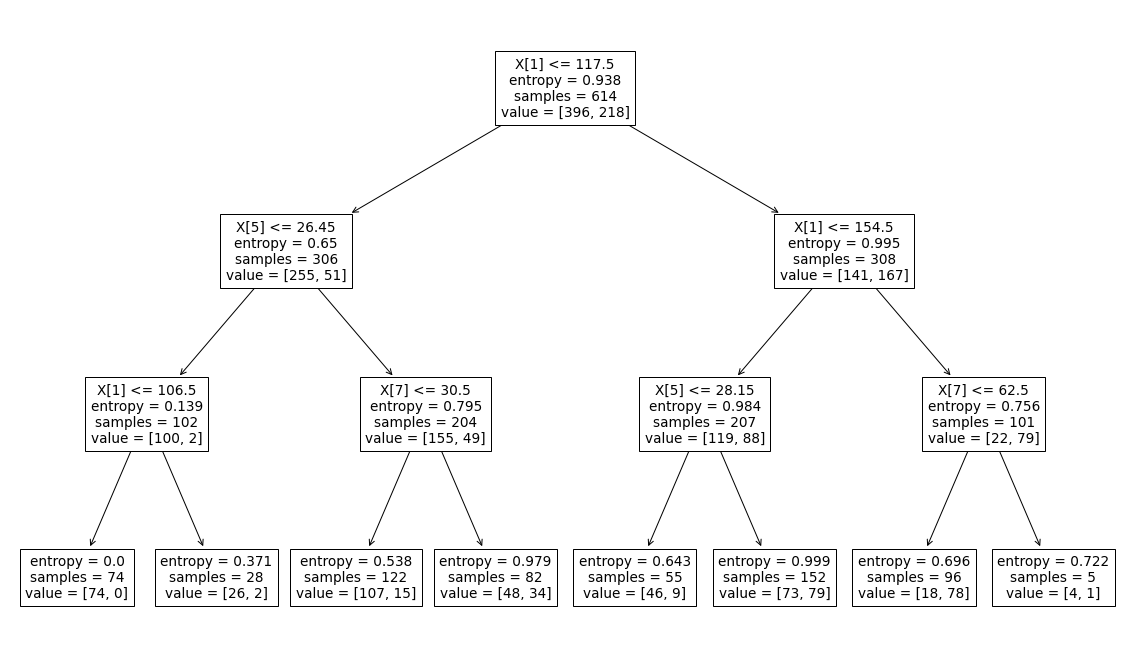

In [ ]:
#5.
#Plotting the resulting tree
plt.figure(figsize=(20,12))
tree.plot_tree(dtpima_model)
plt.show()

**Question**: Look at the decision tree, what are the features that the decision tree is looking at to make its decisions? Why did the decision tree choose to look at those features? 

*Answer:* The features that the decision tree is looking at to make its decisions are X[1]:Glucose, X[5]:BMI and X[7]:Age. 

The decision tree chose to look at those features because those features are most informative than others. The first split is made on the most informative feature and then at every split, entropy and information gain are recomputed and again the most informative feature is chosen. 

***


# Part Two

In this part we trim the dataset down to three features. Then we clean the dataset by removing rows that are missing values. Finally we standardize the features to provide feature magnitude consistency for the distance calculations of k nearest neighbors.  The  code cell below creates a new dataset, pima_clean, and then generates standardized training and testing data.

We will now see if the performance changes. Repeat the code above that creates the three different models and evaluates them. You don't need to plot the decision tree this time, although do produce it's confusion matrix.


In [ ]:
# Pull out just three columns into a new dataset
pima_clean = pima.loc[:,['Glucose','BMI','Age','Outcome']].copy()

# Clean the data
# Replace the 0's with NaN (not a number)
# then use dropna to drop all rows containing a NaN
pima_clean['Glucose'].replace(0, np.nan, inplace=True)
pima_clean['BMI'].replace(0, np.nan, inplace=True)
pima_clean['Age'].replace(0, np.nan, inplace=True)
pima_clean = pima_clean.dropna()

# Create training and test sets
training_set, test_set = train_test_split(pima_clean, test_size=0.20)

# Use the first two features for training
# Using only two features means we can plot the training points
training_features = training_set.iloc[:,:-1]
# Targets are at the end
training_targets = training_set.iloc[:,-1]

# Pull out the same features and targets from test set
testing_features = test_set.iloc[:,:-1]
testing_targets = test_set.iloc[:,-1]

# Scale each feature to have to a mean of 0 and std. dev. of 1
feature_scaler = StandardScaler().fit(training_features)
training_features = feature_scaler.transform(training_features)
testing_features = feature_scaler.transform(testing_features)

In [ ]:
#Creating a Guassian Naive Bayes Model using the default parameters and fitting it to the training data
gnbclean_model = GaussianNB()
gnbclean_model.fit(training_features, training_targets)

GaussianNB(priors=None, var_smoothing=1e-09)

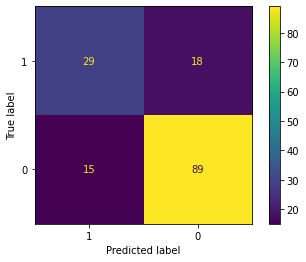

In [ ]:
#Plotting the resulting confusion matrix using the testing data
plot_confusion_matrix(gnbclean_model, testing_features, testing_targets, labels=[1, 0])

In [ ]:
#Creating a K-nearest neighbors model using the default parameters and fitting it to the training data
knnclean_model = KNeighborsClassifier(metric='euclidean', n_neighbors=5)
knnclean_model.fit(training_features, training_targets)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

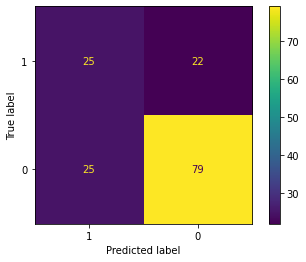

In [ ]:
#Plotting the resulting confusion matrix using the testing data
plot_confusion_matrix(knnclean_model, testing_features, testing_targets, labels=[1, 0])

In [ ]:
#Creating a Decision Tree model using entropy for attribute selection and a depth limit of 3
dtclean_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtclean_model.fit(training_features, training_targets)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

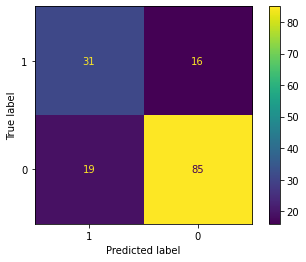

In [ ]:
#Plotting the resulting confusion matrix using the testing data
plot_confusion_matrix(dtclean_model, testing_features, testing_targets, labels=[1,0])

## Short Answer Two

**Question to answer**: Why might I trim the dataset down to just three features? Why might I have picked those features? In general, what effect on model performance would you expect from cutting features from the data?

In general, what effect on model performance would you expect from cleaning the data, i.e. removing data points that are missing values?


Again, run the above code (Part Two) three times (including the separation of training and testing sets) and calculate the accuracy for each model for each run. How do the models fare this time? How do the results compare to before?

Create text cells below and answer these questions.

*Answer:* You might have trimmed down the dataset to just three features in order to include only the most relevant features helpful for predicting the outcome which is whether an individual tested positive for diabetes. 

You might have picked those features because those three features are represented in the decision tree that we made earlier which denotes that those features have a higher information gain than other features and are more useful for predicting the outcome. Those three features might have been the most relevant and might have the most effect for predicting the outcome about diabetes.  

In general, I would expect the model performance to improve from cutting features from the data because irrelavant features can hurt model performance. This negative effect on the performance of the model could be eliminated by removing irrelavant features.   

*Answer:* In general I would expect a reduced model perfomance from cleaning the data, i.e. removing data points that are missing values because the total number of data points to train the model will go down which can reduce model performance unless we have a very large dataset that can cover up for the reduction in data points.  


**Round 1 Accuracies:**

Guassian Model = 0.688741
***
K-Nearest Neighbors Model = 0.735099
***
Decision Tree Model = 0.708609
***
**Round 2 Accuracies:**

Guassian Model = 0.794702
***
K-Nearest Neighbors Model = 0.675497
***
Decision Tree Model = 0.781457
***
**Round 3 Accuracies:**

Guassian Model = 0.807947
***
K-Nearest Neighbors Model = 0.774834
***
Decision Tree Model = 0.761589
***

**Average Accuracies**

Guassian Model = 0.763797
***
K-Nearest Neighbors = 0.728477
***
Decision Tree Model = 0.750552
***


The model that has the highest average accuracy is Guassian Model this time and the model with the lowest average accuracy is the K-nearest neighbor model. But all three models show closer performance accuracies than the models from the original dataset. The Guassian model which has the highest accuracies in the second and third rounds (in the upper 70%s), has an accuracy of less than 70% in the first round in the cleaned dataset. 

The averages for the cleaned dataset are quite similar to those for the original dataset and are up or down by just a few points. Overall the K-nearest neighbors model shows a better perfomance in the cleaned dataset than the original. The individual accuracies are sometimes similar whereas sometimes higher for the cleaned dataset than the original dataset.  